# Dancing with Myself: A Data Science Analysis of the Individual Renter and the Halifax Rental Market

Info 6270

April 12th, 2021

Jordan Audas

## Introduction

The rise of the global internet has certainly facilitated the spread of information over the past 30 years, but it has also made the spread of misinformation much easier. Recently, an article produced by The Coast, a Halifax weekly newspaper, caught social media on fire with its eye-popping headline that claimed that “Rent for a one-bedroom up 20 percent from last year” (McKenna, 2021). The title of the article, uploaded as an Instagram picture, was shared wildly and drew widespread criticism of the rental market in Halifax. What many people missed, however, was that the data that this article was based on, which was not included in the Instagram post, was gathered from a website called Rentals.ca, not the government produced data available from Canadian Mortgage and Housing Corporation. This data only includes a very select number of rental units in Halifax and does not include tenant rent increases or information about occupied rentals (Myers, 2021). Concluding that rent for a one-bedroom is up 20 percent from this dataset would be like concluding that guitar prices are up 20 percent because one checked the available listings on Kijiji.

Although the reliability of the above case is obviously quite dubious, it nonetheless attempts to illustrate an important point that is often missed when discussing the rental market: the individual. It is noted that financial advisors often counsel their clients to spend no more than 30% of their gross income on housing (Conrad, 2021), but 30% of an individual’s gross income compared to a couple’s or family’s makes quite a drastic difference. The United Nations’ document on The Right to Adequate Housing (2014), states in its opening paragraph that “International human rights law recognizes everyone’s right to an adequate standard of living, including adequate housing” (p. 1), but many people in Halifax who live in rentals can only afford to do so because of roommates who help share the price. Everyone, however, should have access to affordable housing, not just those who can depend on help with the rent from roommates, family members, or friends.

These individuals are often referred to as low-income and non-seniors (LINS), and it is well documented how these one-person households struggle to find affordable housing. Leviten-Reid et al (2020), for instance, note that, when discussing the rental and housing market in Cape Breton Regional Municipality, housing insecurity is partially a result of the focus on affordable housing for _families_, rather than individuals. As LINS have fewer rental options available to them, this can result in more housing needs and individual homelessness. In fact, the majority of homeless individuals in Canada are between 24 and 49 and are without dependents or partners (Leviten-Reid et al., 2020).

Another relevant perspective when discussing housing accessibility is the concept of housing as a neoliberal commodity. Affordable housing, housing-based profits, and asset-based welfare are inherently in direct competition with each other. The increasing view, spurred by financial jargon, of housing as an asset worth equity rather than an individual right produces these contradictions (Kalman-Lamb, 2017). The inaccessibility of owning homes raises the need for affordable rentals for individuals.

This analysis, then, will focus on the affordability of one-bedroom rental units within the city of Halifax. Comparing these average rental prices to the pay scales of Nova Scotian government employees will illustrate whether a person employed by the government is actually able to live in Halifax on their own. I have chosen to specifically analyze provincial employees for two reasons. First, it is popularly believed that government employees are well paid and secure in their positions, thus, whether they can afford to live within the capital city of the province they work for will be quite eye-opening, especially considering their income advantage. Second, and more importantly, the government is meant to figuratively provide for their constituents, but it must literally provide for its employees. Evaluating the success of the provincial government in combating the growing housing and rental crisis, then, can first be measured by the access to these units by their own employees.

## Section I: Gathering the Data and Preliminary Analysis

The Nova Scotia government releases their employee pay scales on the Open Data Nova Scotia website (Public Service Commission, 2021). The current set of data is updated as of March 5th, 2021, and is therefore new enough to be relevant for this analysis. The following code imports the appropriate tools for analyzing this data as well as importing the CVS file of the pay scales.

In [1]:
import pandas as pd #import pandas 

import numpy as np #import numpy

import matplotlib.pyplot as plt #import mapplotlib

import seaborn as sns #import seaborn

sns.set() #set seaboarn as default

NS_payrates = pd.read_csv('FP/Nova_Scotia_Government_Pay_Scales.csv') #command pandas to import the data

In [2]:
NS_payrates.head() #checks first five rows of the dataframe

,Start_Date,End_Date,Pay_Plan_Type,Pay_Plan,Pay_Plan_Level,Biweekly_Pay_Rate,Hourly_Pay_Rate
0,04/01/2012,03/31/2013,Bargaining Unit,CL 02,1,"1,009.04",NaN
1,04/01/2013,03/31/2014,Bargaining Unit,CL 02,1,"1,034.27",NaN
2,04/01/2014,03/31/2015,Bargaining Unit,CL 02,1,"1,065.30",NaN
3,04/01/2012,03/31/2013,Bargaining Unit,CL 02,2,"1,032.44",NaN
4,04/01/2013,03/31/2014,Bargaining Unit,CL 02,2,"1,058.25",NaN


## Section I.I: Hourly Paid Nova Scotia Government Employees

Appropriate refinement to this dataset will have to occur in order to properly analyze it. The first step will be to create two different data frames in order to accurately compare the government employees who are paid hourly and those who are on a salary.


The code below removes the column "Biweekly_Pay_Rate", which is the pay rate of salaried employees, allowing information regarding employees who are paid hourly to be gathered.

In [3]:
hourly_NS_payrates = NS_payrates.drop(labels='Biweekly_Pay_Rate', axis=1) #drop the biweekly column
hourly_NS_payrates.head() #check first five row

,Start_Date,End_Date,Pay_Plan_Type,Pay_Plan,Pay_Plan_Level,Hourly_Pay_Rate
0,04/01/2012,03/31/2013,Bargaining Unit,CL 02,1,NaN
1,04/01/2013,03/31/2014,Bargaining Unit,CL 02,1,NaN
2,04/01/2014,03/31/2015,Bargaining Unit,CL 02,1,NaN
3,04/01/2012,03/31/2013,Bargaining Unit,CL 02,2,NaN
4,04/01/2013,03/31/2014,Bargaining Unit,CL 02,2,NaN


Although the data for the hourly paid employees is now seperated, there is still quite a bit of information left that is not relevant. The following code removes the additional columns in the dataframe as well removing all values that appear as NaN. These NaN values correspond to the employees who are paid biweekly and are therefore not relevant for this section of the analysis.

In [4]:
mod_hourly_NS_payrates_one = hourly_NS_payrates.drop(
    ['Start_Date', 'End_Date', 'Pay_Plan_Type', 'Pay_Plan', 'Pay_Plan_Level'], axis=1) 
#drops all columns except Hourly_Pay_rate

mod_hourly_NS_payrates = mod_hourly_NS_payrates_one.dropna() #removes instances of NaN

In [5]:
mod_hourly_NS_payrates.sort_values("Hourly_Pay_Rate", ascending = False) #sort values by descending amount

,Hourly_Pay_Rate
18470,38.82
18469,38.63
18468,38.06
18467,37.87
18449,37.71
...,...
26200,13.62
3085,13.49
11124,13.49
11154,13.49


Now that the data for hourly paid employees has been sufficiently cleaned up, visualizing these results can be beneficial in understanding the data. The following codes create a histogram and a plot line with this data.

<AxesSubplot:>

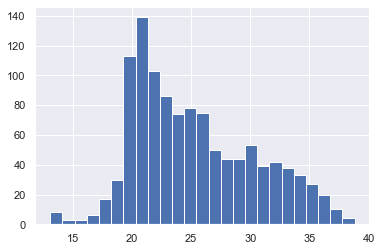

In [6]:
mod_hourly_NS_payrates['Hourly_Pay_Rate'].hist(bins=25) #visualizes Hourly_Pay_Rate as a histogram

<AxesSubplot:>

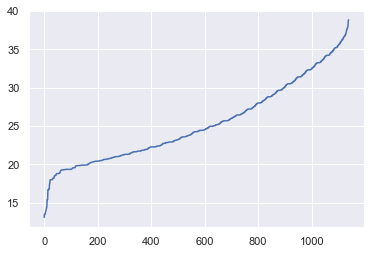

In [7]:
mod_hourly_NS_payrates['Hourly_Pay_Rate'].sort_values().plot(use_index=False) #visualizes Hourly_Pay_Rate as a line plot

Just by looking at these graphs we can make a fairly accurate guess of the average pay rate for hourly employees, probably around 25 dollars an hour. The following code, however, calculates this exact number.

In [8]:
print("The average hourly Nova Scotia government employee makes " + "$" +
    str(round(hourly_NS_payrates.Hourly_Pay_Rate.mean(), 2)) + " per hour") #calculates the mean and rounds to two decimals

The average hourly Nova Scotia government employee makes $25.26 per hour


As mentioned above, it is important to remember that financial advisors recommend spending no more than 30% of monthly income on housing costs (Conrad, 2021). When calculating monthly income from hourly rates, then, one must be mindful of calculating the maximum amount advisable to spend on rent. 

The following codes calculate monthly income and rent allowance for the average hourly government employee.

In [9]:
daily_pay = (25.26) * 7 #hourly pay rate multiplied by 7 hours worked returns the daily pay rate

weekly_pay = daily_pay*5 #daily pay rate multiplied by 5 days in the week returns the weekly pay rate

monthly_pay = weekly_pay*4 #weekly pay rate multiplied by 4 weeks in a month returns the monthly pay rate

print("The average hourly Nova Scotia government employee makes " + "$" +
    str(round(monthly_pay, 2)) + " monthly. This means that they can spend, maximum, " + "$" +
     str(round(monthly_pay/100*30, 2)) + " on rent per month.")

#calculates the monthly pay rate and rounds to two decimals
#calculates the rent allowance and rounds to two decimals

The average hourly Nova Scotia government employee makes $3536.4 monthly. This means that they can spend, maximum, $1060.92 on rent per month.


In [10]:
av_NS_hourly_rent = 1060.92 #saves rent allowance for average Nova Scotia hourly employee as callable item

## Section I.II: Salaried Nova Scotia Government Employees

Now that the appropriate data has been collected for hourly paid Nova Scotia government employees, the same must be done for the salaried employees. As you can see below, however, this must be done differently than was done previously. The pay rate for salaried employees is being read as a string of characters, most likely because of the addition of commas in the dataset. Thus, before calculating average salaried employee data, conversion of these strings into floats, or numbers with decimals, must take place.

In [11]:
biweekly_NS_payrates = NS_payrates.drop(labels='Hourly_Pay_Rate', axis=1) #drops hourly pay rate column
biweekly_NS_payrates.head() #checks first five rows

,Start_Date,End_Date,Pay_Plan_Type,Pay_Plan,Pay_Plan_Level,Biweekly_Pay_Rate
0,04/01/2012,03/31/2013,Bargaining Unit,CL 02,1,"1,009.04"
1,04/01/2013,03/31/2014,Bargaining Unit,CL 02,1,"1,034.27"
2,04/01/2014,03/31/2015,Bargaining Unit,CL 02,1,"1,065.30"
3,04/01/2012,03/31/2013,Bargaining Unit,CL 02,2,"1,032.44"
4,04/01/2013,03/31/2014,Bargaining Unit,CL 02,2,"1,058.25"


In [12]:
mod_biweekly_NS_payrates_one = biweekly_NS_payrates.drop(
    ['Start_Date', 'End_Date', 'Pay_Plan_Type', 'Pay_Plan', 'Pay_Plan_Level'], axis=1)
#drops all columns except Biweekly_Pay_rate

In [13]:
mod_biweekly_NS_payrates = mod_biweekly_NS_payrates_one.dropna() #removes instances of NaN

In [14]:
mod_biweekly_NS_payrates.sort_values("Biweekly_Pay_Rate", ascending = True)
#values are not sorted by ascending values because of likely character mistake

,Biweekly_Pay_Rate
1728,"1,002.09"
1917,"1,003.69"
12,"1,009.04"
0,"1,009.04"
1723,"1,012.98"
...,...
20935,"9,977.32"
1719,974.42
1722,988.27
1725,994.89


In [15]:
mod_biweekly_NS_payrates["Biweekly_Pay_Rate"] = mod_biweekly_NS_payrates["Biweekly_Pay_Rate"].str.replace(",","").astype(float)
#replaces string commas to floats, code adapted from No Author (May 17, 2020).

<ipython-input-15-b40181ce7eab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_biweekly_NS_payrates["Biweekly_Pay_Rate"] = mod_biweekly_NS_payrates["Biweekly_Pay_Rate"].str.replace(",","").astype(float)


In [16]:
mod_biweekly_NS_payrates['Biweekly_Pay_Rate'] = mod_biweekly_NS_payrates['Biweekly_Pay_Rate'].astype(float)
#transforms entire column to float, code adapted from No Author (May 17, 2020).

<ipython-input-16-246d65d09533>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_biweekly_NS_payrates['Biweekly_Pay_Rate'] = mod_biweekly_NS_payrates['Biweekly_Pay_Rate'].astype(float)


Now that the data has been converted to float format, we can now visualize it as we did with the hourly paid employees.

<AxesSubplot:>

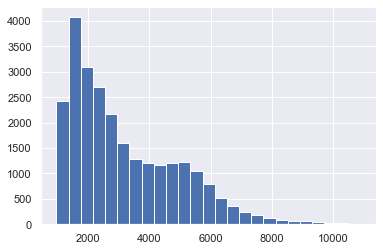

In [17]:
mod_biweekly_NS_payrates['Biweekly_Pay_Rate'].hist(bins=25) #visualizes Biweekly_Pay_Rate as a histogram

<AxesSubplot:>

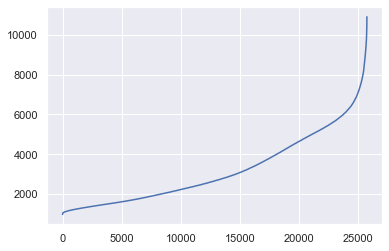

In [18]:
mod_biweekly_NS_payrates['Biweekly_Pay_Rate'].sort_values().plot(use_index=False) #visualizes Biweekly_Pay_Rate as a line plot

In [19]:
mod_biweekly_NS_payrates.Biweekly_Pay_Rate.mean() #the mean of the data

3198.015981642819

As is evident from the above graphs, locating the mean for this group will not be as helpful as it was for the hourly paid employees. In this unique case, the mean does not actually represent what we would normally consider to be the average because of the huge outliers in the data. We can see from the histogram that the majority of salaried employees are paid under 2000 dollars biweekly, yet the mean is above 3000. The absurdly large pay of some of the salaried employees, such as those paid almost 10,000 dollars biweekly, skew the data. Therefore locating the mode, or the most common number, is more appropriate for understanding the average pay rates of salaried employees. The following code calculates this number as well as transforming it into a monthly pay rate and finding the rent allowance.

In [20]:
mod_biweekly_NS_payrates.loc[:,"Biweekly_Pay_Rate"].mode() #calculates mode of Biweekly_Pay_Rate

0     1683.70
1     1753.69
2     1767.56
3     1823.67
4     1841.23
5     1901.35
6     1914.95
7     1979.16
8     2064.63
9     2150.16
10    2235.76
11    2321.26
12    2414.48
13    2507.80
dtype: float64

In [21]:
biweekly_sal_mode = 1683.70 #saves mode as callable item

In [22]:
monthly_biweekly_pay = biweekly_sal_mode*2 
#biweekly pay is multiplied by 2 to calculate monthly pay rate

print("The average salaried Nova Scotia government employee makes " + "$" +
    str(monthly_biweekly_pay) + " monthly. This means that they can spend, maximum, " + "$" +
      str(round(monthly_biweekly_pay/100*30, 2)) + " on rent per month.")
#calculates the monthly pay rate and rounds to two decimals
#calculates the rent allowance and rounds to two decimals

The average salaried Nova Scotia government employee makes $3367.4 monthly. This means that they can spend, maximum, $1010.22 on rent per month.


In [23]:
av_NS_sal_rent = 1010.22 #saves rent allowance of average salaried Nova Scotia government employee as callable item

## Section I.III: Rental Market Data

Now that the rent allowance for each group of workers has been calculated and saved as a callable item, information about the Halifax rental market can now be added. The Canada Mortgage and Housing Corporation (2020) makes rental rates within the primary rental market available to the public yearly for all of Canada. For this analysis I have focused on just the city of Halifax, rather than the municipality. My concern is whether or not workers can afford to live within the capital city, not amongst the neighboring towns of Dartmouth, Bedford, or Sackville that make up the HRM. 

The follwing data has been gathered from the CMHC website. The code saves the information regarding specific unit types within each section of Halifax as dictionary items. Although I am interested solely in the access of these apartments for individuals, I have included rental information for 2 bedrooms and 3 bedrooms for comparison's sake. The crux of this analysis, however, will focus on bachelor and 1 bedroom apartments.

In [24]:
peninsula_south = {'Bach': 930, '1Bdr': 1269, '2Bdr': 1756, '3Bdr': 2029}

peninsula_north = {'Bach': 824, '1Bdr': 1036, '2Bdr': 1267, '3Bdr': 1479}

mainland_south = {'Bach': 'Unknown', '1Bdr': 741, '2Bdr': 1050, '3Bdr': 1145}

mainland_north = {'Bach': 830, '1Bdr': 969, '2Bdr': 1237, '3Bdr': 1492}

#creates dictionaries with units and corresponding rents

## Section II: Average Rental Market Analysis

Now that the monthly rent allowances have been caluclated and the rental prices for the four Halifax areas have been determined, the rental analysis can begin proper. The following code creates a function that will iterate through a specified area in Halifax and determine whether or not the the average hourly paid employee of the government of Nova Scotia can afford to live there. The results will appear in order, starting at bachelor and continuing through to 3 bedroom apartments.

In [25]:
def hourcheckrent(rent):
    if rent == 'Unknown':
        print('Data unknown for this unit type')
    elif rent < av_NS_hourly_rent:
        print('This unit type in this area is affordable')
    else:
        print('This unit in this area is not affordable')
#creates function that checks whether the average hourly employee can afford to live in area and unit

In [26]:
for x, y in peninsula_south.items():
  hourcheckrent(y)
#calls function to iterate through peninsula_south dictionary, code adapted from No Author (August 27, 2020). 

This unit type in this area is affordable
This unit in this area is not affordable
This unit in this area is not affordable
This unit in this area is not affordable


In [27]:
for x, y in peninsula_north.items():
  hourcheckrent(y)
#calls function to iterate through peninsula_north dictionary, code adapted from No Author (August 27, 2020). 

This unit type in this area is affordable
This unit type in this area is affordable
This unit in this area is not affordable
This unit in this area is not affordable


In [28]:
for x, y in mainland_south.items():
  hourcheckrent(y)
#calls function to iterate through mainland_south dictionary, code adapted from No Author (August 27, 2020). 

Data unknown for this unit type
This unit type in this area is affordable
This unit type in this area is affordable
This unit in this area is not affordable


In [29]:
for x, y in mainland_north.items():
  hourcheckrent(y)
#calls function to iterate through mainland_north dictionary, code adapted from No Author (August 27, 2020). 

This unit type in this area is affordable
This unit type in this area is affordable
This unit in this area is not affordable
This unit in this area is not affordable


We can see from the using the hourcheckrent function that the average hourly paid employee of the government of Nova Scotia can afford to live in either a bachelor or one bedroom apartment in all regions of Halifax, with the excpetion of the South End where a one bedroom is unaffordable and mainland south area which does not have data for a bachelor apartment.

In [30]:
def salarycheckrent(rent):
    if rent == 'Unknown':
        print('Data unknown for this unit type')
    elif rent < av_NS_sal_rent:
        print('This unit type in this area is affordable')
    else:
        print('This unit in this area is not affordable')
#creates function that checks whether the average salaried employee can afford to live in area and unit

In [31]:
for x, y in peninsula_south.items():
  salarycheckrent(y)
#calls function to iterate through peninsula_south dictionary, code adapted from No Author (August 27, 2020). 

This unit type in this area is affordable
This unit in this area is not affordable
This unit in this area is not affordable
This unit in this area is not affordable


In [32]:
for x, y in peninsula_north.items():
  salarycheckrent(y)
#calls function to iterate through peninsula_north dictionary, code adapted from No Author (August 27, 2020). 

This unit type in this area is affordable
This unit in this area is not affordable
This unit in this area is not affordable
This unit in this area is not affordable


In [33]:
for x, y in mainland_south.items():
  salarycheckrent(y)
#calls function to iterate through mainland_south dictionary, code adapted from No Author (August 27, 2020). 

Data unknown for this unit type
This unit type in this area is affordable
This unit in this area is not affordable
This unit in this area is not affordable


In [34]:
for x, y in mainland_north.items():
  salarycheckrent(y)
#calls function to iterate through mainland_north dictionary, code adapted from No Author (August 27, 2020). 

This unit type in this area is affordable
This unit type in this area is affordable
This unit in this area is not affordable
This unit in this area is not affordable


The results using salarycheckrent, which calculates whether a salaried Nova Scotia government employee can afford rent, are not as straightforward as the hourly employees results. Although salaried employees can also afford to live in a bachelor apartment in any region of Halifax (with the excpetion of mainland south area which does not have data), the one bedroom units in the North and South End are unaffordable for this group. The one bedrooms in the mainland south and north, however, are indeed affordable for salaried employees.

## Section III: Further Rental Market Analysis

Although we could claim that this analysis is complete and pat the government of Nova Scotia on the back for adequately providing for their average hourly and salaried employees, further analysis is possible for a more specific view of rental affordability and accessibility. Rather than calculating the average income of these employees, it is possible to view whether or not each individual is able to afford rent. 

To begin, the code below combines the two dataframes, the hourly paid employees and the salaried employees, into one.

In [35]:
merged_data = mod_biweekly_NS_payrates.append(mod_hourly_NS_payrates) #merges hourly and salaried dataframes

In [36]:
merged_data.head() #checks first five items

,Biweekly_Pay_Rate,Hourly_Pay_Rate
0,1009.04,NaN
1,1034.27,NaN
2,1065.30,NaN
3,1032.44,NaN
4,1058.25,NaN


Now that we have one fully encompassing dataframe, we can add new columns to it. The following codes calculate the monthly income for each hourly paid and salaried employees and then calculates the rental allowance, adding this amount to its own unique column.

In [37]:
merged_data['Rent_Allowance_Biweekly'] = merged_data.apply(lambda row: row['Biweekly_Pay_Rate'] * 2/100*30, axis=1)
#adds new column that calculates each individual salaried employee's rent allowance

In [38]:
merged_data['Rent_Allowance_Hourly'] = merged_data.apply(lambda row: row['Hourly_Pay_Rate'] * 7 *20/100*30, axis=1)
#adds new column that calculates each individual hourly paid employee's rent allowance

In [39]:
merged_data.head() #checks first five items

,Biweekly_Pay_Rate,Hourly_Pay_Rate,Rent_Allowance_Biweekly,Rent_Allowance_Hourly
0,1009.04,NaN,605.424,NaN
1,1034.27,NaN,620.562,NaN
2,1065.30,NaN,639.180,NaN
3,1032.44,NaN,619.464,NaN
4,1058.25,NaN,634.950,NaN


Now that we have calculated each employee's rent allowance, we can compare it to actual rental prices to see whether they can afford to live in Halifax. I have elected to illustrate this by calculating the mean of bachelor and one bedroom apartments in all four areas of Halifax, meant to represent the average price an individual would pay to live on their own. The following code calculates this mean as well as adding new columns to the dataframe that state whether each hourly or salaried employee's rent allowances reach this threshold.

In [40]:
print(round((930 + 1269 + 824 + 1036 + 741 + 830 + 969)/7, 2)) #calculates mean of bachelor and one bedroom apartments

942.71


In [41]:
merged_data['Hourly_Can_Afford_Rent'] = np.where(merged_data['Rent_Allowance_Hourly']> 942.71, True, False)
#caculates whether the rent allowance for an hourly employee is more than mean of apartments, 
#adapted from Custer, (July 1, 2020). 

In [42]:
merged_data['Sal_Can_Afford_Rent'] = np.where(merged_data['Rent_Allowance_Biweekly']> 942.71, True, False)
#caculates whether the rent allowance for a salaried employee is more than mean of apartments
#adapted from Custer, (July 1, 2020). 

In [43]:
merged_data.head() #checks first five items

,Biweekly_Pay_Rate,Hourly_Pay_Rate,Rent_Allowance_Biweekly,Rent_Allowance_Hourly,Hourly_Can_Afford_Rent,Sal_Can_Afford_Rent
0,1009.04,NaN,605.424,NaN,False,False
1,1034.27,NaN,620.562,NaN,False,False
2,1065.30,NaN,639.180,NaN,False,False
3,1032.44,NaN,619.464,NaN,False,False
4,1058.25,NaN,634.950,NaN,False,False


Although the False counts are meaningless due to the instances of NaN in each column, the True counts represent the total amount of each group of employees who can actually afford to live in Halifax. Going back to the previous dataframes, we can use code to count the total of hourly paid and salaried Nova Scotia government employees and compare this total to the amount of Trues. This will calculate the percentage of each group of employees which can afford to live in Halifax.

In [44]:
merged_data['Hourly_Can_Afford_Rent'].value_counts() 
#counts true and false statements in Hourly_Can_Afford_Rent column, adapted from JPP (November 21, 2018)

False    26147
True       704
Name: Hourly_Can_Afford_Rent, dtype: int64

In [45]:
merged_data['Sal_Can_Afford_Rent'].value_counts() 
#counts true and false statements in Sal_Can_Afford_Rent column, adapted from JPP (November 21, 2018)

True     21106
False     5745
Name: Sal_Can_Afford_Rent, dtype: int64

In [46]:
mod_hourly_NS_payrates.count() #counts total hourly employees

Hourly_Pay_Rate    1139
dtype: int64

In [47]:
mod_biweekly_NS_payrates.count() #counts total salaried employees

Biweekly_Pay_Rate    25712
dtype: int64

In [48]:
stats_hour_rent = round((704/1139)*100, 2) #calculates percentage of hourly employees who can afford to live in Halifax

print("Out of 1139 Nova Scotia government employees who are paid hourly, 704 of these individuals can afford to pay for an" + 
      " average bachelor or one bedroom apartment in Halifax. This means that " +
      str(stats_hour_rent) + "%" + " of hourly employees can afford to live in Halifax on their own. ")

Out of 1139 Nova Scotia government employees who are paid hourly, 704 of these individuals can afford to pay for an average bachelor or one bedroom apartment in Halifax. This means that 61.81% of hourly employees can afford to live in Halifax on their own. 


In [49]:
stat_sal_rent = round((21106/25712)*100, 2) #calculates percentage of salaried employees who can afford to live in Halifax

print("Out of 25712 Nova Scotia government employees who are salaried, 21106 of these individuals can afford to pay for an" + 
      " average bachelor or one bedroom apartment in Halifax. This means that " +
      str(stat_sal_rent) + "%" + " of salaried employees can afford to live in Halifax on their own. ")

Out of 25712 Nova Scotia government employees who are salaried, 21106 of these individuals can afford to pay for an average bachelor or one bedroom apartment in Halifax. This means that 82.09% of salaried employees can afford to live in Halifax on their own. 


## Conclusion

We can see from the average hourly and salaried Nova Scotia government employees that they are most likely able to afford to live in a bachelor or one bedroom within the capital city, with a few exceptions. However, when we calculate the average price of these units and compare them to each individual employee, the results are far less promising. Although salaried employees have quite a high likely hood of affording rent, hourly employees are much lower. Less than 2/3rds of hourly government of Nova Scotia employees can afford to live in Halifax. This raises questions of how we value different types of labour. Since hourly employees are more likely to be in the customer service or physical labour sectors of work, does this mean that people who do this type of job don't deserve the ability to afford a rental unit in Halifax? This necessary work is what has come to be known as 'unskilled', a term that works to belittle and minimize their labour. Further complications arrive when we consider the available dataset in this analysis. For instance, Leviten-Reid et al (2019) note that the rental data available from CMHC is defined as the actual rent tenants pay, this amount _may or may not_ include utilities like heating, electricity, or water. Most rents, in fact, do not include all utilities, meaning that the rental market data is incomplete. Further limitations of the traditional data is that, in the Cape Breton Regional Municipality where Leviten-Reid et al studied, 43% of rental units are in the secondary market, like basements of houses, duplexes, and other places, which the government does not collect. It is important to say, then, that this analysis _somewhat_ reflects the reality of government employees living in Halifax. Further collection of data will have to be done to result in a definite guide to the rental market.




## References

Canada Mortgage and Housing Corporation. (October 2020). _Primary rental market_. Housing Market Information Portal. Retrieved March 1st, 2021, from https://www03.cmhc-schl.gc.ca/hmip-pimh/en#TableMapChart/0580/3/Halifax CMA (cmhc-schl.gc.ca)

Conrad, C. (January 18, 2021). _Weekly lab exercise 3 – Basic data cleaning and analysis of Halifax’s housing data_. INFO 6270. Retrieved March 3, 2021.

Custer, C. (July 1, 2020). _Tutorial: Add a column to a Pandas dataframe based on an if-else condition_. DataQuest. Retrieved April 9th, 2021, from https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

JPP. (November 21, 2018). _Count occurrences of true/false in column of dataframe_. Stack Overflow. Retrieved April 9th, 2021, from https://stackoverflow.com/questions/53415751/count-occurences-of-true-false-in-column-of-dataframe

Kalman-Lamb, G. (2017). The financialization of housing in Canada: Intensifying contradictions of neoliberal accumulation. _Studies in Political Economy, 93_(3), 298 – 323. https://doi.org/10.1080/07078552.2017.1393911

Leviten-Reid, C., & Parker, B. (2018). Left out? Housing insecurity for one-person, low-income, non-senior households in Cape Breton Regional Municipality. _The Canadian Geographer/ Le Géographe Canadien, 62_(4), 470–481.

Leviten-Reid, C., Horel, B., Matthew, R., Deveaux, F., Vassallo, P. (2019). Strong foundations: Building community through improved rental housing data. _Journal of Rural and Community Development 14,3_(2019), 74 – 86.

McKenna, C. (February 19, 2021). _Rent for a one-bedroom up 20 percent from last year_. The Coast Halifax. Retrieved March 3, 2021, from https://www.thecoast.ca/halifax/rent-for-a-one-bedroom-up-20-percent-from-last-year/Content?oid=25825763 

Myers, B. (February 2021). _Rentals.ca February 2021 rent report_. Rentals.ca. Retrieved March 3, 2021. From https://rentals.ca/national-rent-report

No Author. (August 27, 2020). _About dictionaries in Python. Python for Beginners_. Retrieved April 5th, 2021, from https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

No Author. (May 17, 2020). _How to convert strings to floats in Pandas dataframe_. Data to Fish. Retrieved April 4th, 2021, from https://datatofish.com/convert-string-to-float-dataframe/#:~:text=Depending%20on%20the%20scenario%2C%20you%20may%20use%20either,%3D%20df%20%5B%27DataFrame%20Column%27%5D.astype%20%28float%29%20%282%29%20to_numeric%20method

Office of the United Nations High Commissioner for Human Rights, The. (2014). _Fact sheet no. 21(Rev. 1): The right to adequate housing_. Retrieved from https://ohchr.org/Documents/Publications/FS21_rev_1_Housing_en.pdf 

Public Service Commission. (March 5, 2021). _Nova Scotia government pay scales_. Open Data Nova Scotia. Retrieved March 5th, 2021, from https://data.novascotia.ca/Employment-and-Labour/Nova-Scotia-Government-Pay-Scales/hn6q-5dmm
